## Semillero de Programación Sesión 12: 
### Repaso Tweepy: Nubes de Palabras con cuentas
### Felipe Botero, Laura Merchán y Wilson Forero

En esta sesión repasaremos Tweepy y los análisis de Text Mining. Para ello, descargaremos los tweets del ex-presidente Álvaro Uribe Para hacer una nube de palabras.

#### 1. Importar los paquetes necesarios

In [63]:
import tweepy
from wordcloud import WordCloud
from stop_words import get_stop_words
import spacy
import matplotlib.pyplot as plt
import re

#### 2. Ingresar sus credenciales

In [2]:
####input your credentials here
APP_KEY3 = 'OUiAO6uAFcw0vO9jJH06BItmx'
APP_SECRET3 = 'm9MGsXpoaLNQKavCIwrfglLo0DzXaMDUrtg8U01L0J4iE1c8Wf'
OAUTH_TOKEN3 = '362151448-KeL5d7MhUvui1QiK8jtunMBjb7dhbAJza5SBiQhy'
OAUTH_TOKEN_SECRET3 =''

#### 3.  Autenticar las credenciales

In [3]:
auth = tweepy.OAuthHandler(APP_KEY3, APP_SECRET3)
auth.set_access_token(OAUTH_TOKEN3, OAUTH_TOKEN_SECRET3)

api3 = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [96]:
type(api3)

tweepy.api.API

#### Challenge 1: ¿Qué es api3?

es el objeto (aplicación) con el cual podemos conectarnos con la api de Twitter

#### 4. Descargemos los tweets de Álvaro Uribe (este código ya lo vimos en la sesión 10)

In [88]:
tweets_user=[]
screen_name="AlvaroUribeVel"
try:
    tweets_user=api3.user_timeline(id=screen_name,tweet_mode='extended', count=200)
except Exception as e:
    print(e, id)

#### Challenge 2: ¿Qué es tipo de estructura de datos tiene tweets_user?

In [ ]:
Es una lista

* A continuación les diré paso a paso como construir una nube de palabras con los tweets extraidos en tweets_user, la idea es que puedan hacerlo con los conocimientos que ya han adquerido.

#### Challenge 3: Construir una Nube de Palabras


1. Si usted revisa  el objeto `tweets_user`, se podrá dar cuenta que contiene más de una variable por tweet. Entre todas las variables, existe una llamada `full.text`. Como usted desea hacer una nube de palabras con todos los textos usted debe unificar todos los `full.text` en un elemento tipo string. Pista: Para hacerlo primero cree un string vacio y segundo cree un loop (es muy sencillo) donde coja cada el `full.text` de cada tweet y lo pegue en ese string vacio

In [89]:
texto_string=""
for tweet in tweets_user:
    texto_string=texto_string+tweet.full_text

2. Vea el string que creo. Se podrá dar cuenta que existen hipervínculos en su texto. Como usted no desea que esos hipervínculos esten incluidos en la nube de palabras, busque en internet como deshacerse de ellos en el string Pista: requiere uso de una expresión regular por lo que necesitará usar una función del paquete regex (re)

In [90]:
texto_string = re.sub(r'http\S+', '', str(texto_string))

3. Saque las `stopwords` del español. Pista: lo vimos en la sesión 6

In [92]:
stopwords_es= get_stop_words('es')

4. Haga una nube de palabras con el texto, quitando las stopwords

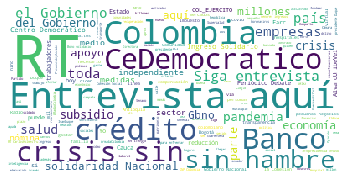

In [93]:
wordcloud = WordCloud(background_color ='white',stopwords=stopwords_es).generate(texto_string) 
  
# plot the WordCloud image                        
plt.figure() 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.savefig('./gráfica1.png')
plt.show()

In [98]:
def start(tags=None):
        tags = tags or ['#dog', '#dogs', '#puppy', '#cat', '#kitty', '#lolcat', '#kitten']

        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_token_secret)

        api = tweepy.API(auth)

        listener = PhotoStreamListener()
        listener.tags = tags
        stream = tweepy.Stream(auth=api.auth, listener=listener)
        try:
            stream.filter(track=tags)
        except Exception as e:
            print('Shutting down')
            print(e) 